# Przetwarzanie Grafiki i Muzyki - laboratorium nr 5

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Zadanie 1 (2 punkty)

Wygeneruj sygnał w kształcie funkcji sinus. Następnie dodaj do niego szumy:

  * Gaussowski: $N\left(0,0.5^2\right)$
  * Jednostajny: $U\left(-0.5,0.5\right)$
  * Sól i pieprz
  
Oraz wykonaj na nich filtry:

  * Średniej ruchomej
  * Medianowy

Wygeneruj 3 zestawy rysunków - na każdym z nich przedstaw wykres sinusa, sinusa z dodanym szumem oraz zaaplikowanymi filtracjami. Napisz, które filtry radzą sobie dobrze z podanymi typami zakłóceń. Dodaj legendę.

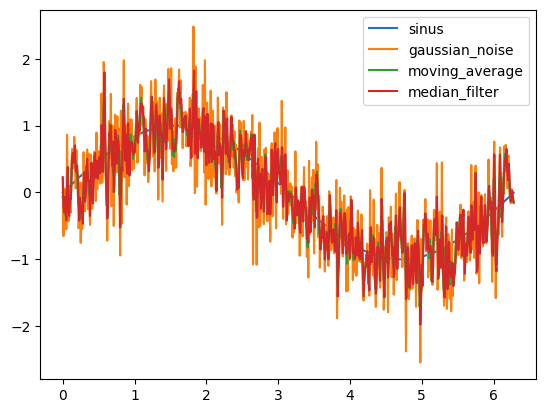

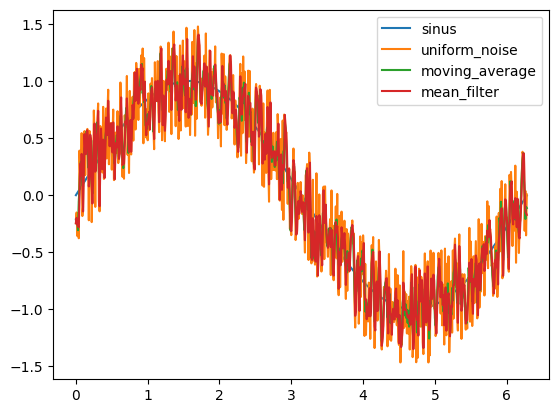

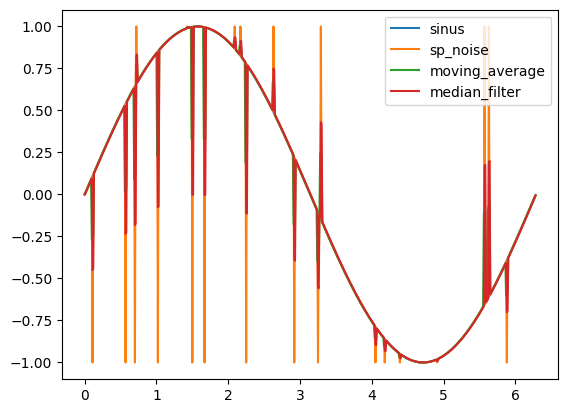

In [47]:
x = np.arange(0, 2*np.pi, 0.01)
sinus = np.sin(x)

gaussian_noise = sinus + np.random.normal(0, 0.5, sinus.shape)
uniform_noise = sinus + np.random.uniform(-0.5, 0.5, sinus.shape)

sp_noise_percentage = 0.05
sp_mask = np.random.uniform(0, 1, sinus.shape)
sp_max_mask = (sp_mask > (1 - sp_noise_percentage / 2))
sp_min_mask = (sp_mask < sp_noise_percentage / 2)
sp_noise = np.copy(sinus)
sp_noise[sp_max_mask] = sinus.max()
sp_noise[sp_min_mask] = sinus.min()


def moving_average(arr):
    bigger_arr = np.insert(arr, 0, arr.flat[0])
    bigger_arr = np.append(bigger_arr, arr.flat[-1])
    result = np.cumsum(bigger_arr, dtype=float)
    
    result[3:] = result[3:] - result[:-3]
    return result[2:] / 3

def median_filter(arr):
    bigger_arr = np.insert(arr, 0, arr.flat[0])
    bigger_arr = np.append(bigger_arr, arr.flat[-1])
    result = np.zeros_like(arr)
    for i in range(0, bigger_arr.shape[0]-2):
        result[i] = np.median(bigger_arr[i:i+2])
    return result

plt.figure()
plt.plot(x, sinus, label='sinus')
plt.plot(x, gaussian_noise, label='gaussian_noise')
plt.plot(x, moving_average(gaussian_noise), label='moving_average')
plt.plot(x, median_filter(gaussian_noise), label='median_filter')
plt.legend()
plt.show()
plt.figure()
plt.plot(x, sinus, label='sinus')
plt.plot(x, uniform_noise, label='uniform_noise')
plt.plot(x, moving_average(uniform_noise), label='moving_average')
plt.plot(x, median_filter(uniform_noise), label='mean_filter')
plt.legend()
plt.show()
plt.figure()
plt.plot(x, sinus, label='sinus')
plt.plot(x, sp_noise, label='sp_noise')
plt.plot(x, moving_average(sp_noise), label='moving_average')
plt.plot(x, median_filter(sp_noise), label='median_filter')
plt.legend()
plt.show()

## Zadanie 2 (2 punkty)

Napisz funkcję realizującą dodawanie do obrazka zakłócenia o rozkładzie jednostajnym na odcinku $U\left(-\alpha, \alpha\right)$ w taki sposób, by liczba wylosowana z tego rozkładu była dodatkowo mnożona przez prawdopodobieństwo wystąpienia tego zjawiska (a właściwie przez maskę 0-1). Proszę przetestować funkcję na obrazie LENA_512 w wersji kolorowej i w odcieniach szarości.

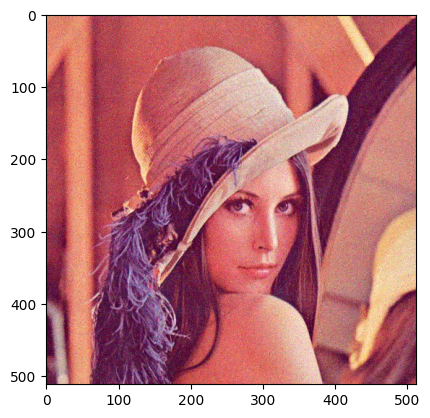

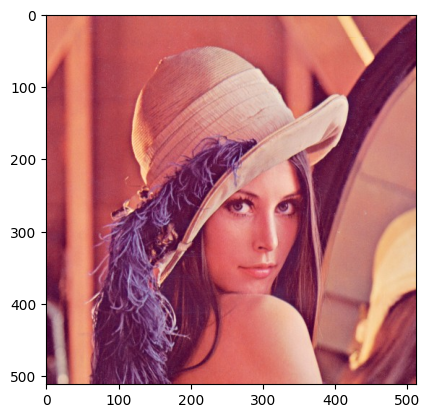

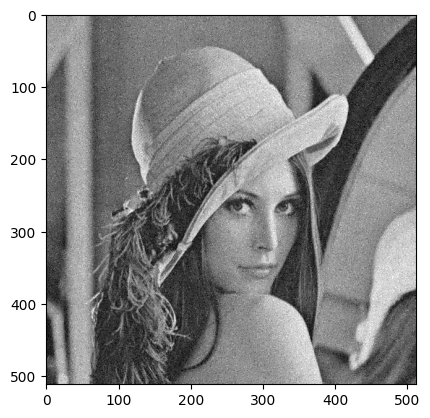

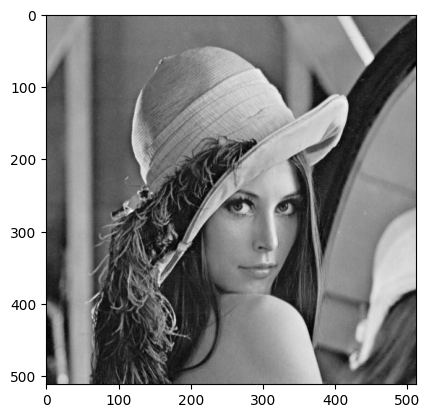

In [4]:
lena = cv2.imread('img/LENA_512.jpg')
lena_gray = cv2.imread('img/LENA_512.jpg', cv2.IMREAD_GRAYSCALE)

def uniform_noise(img, alpha=50, prob=0.3):
    mask = np.random.uniform(0, 1, img.shape) < prob
    noise = np.random.uniform(-alpha, alpha, img.shape)
    res = img.astype(np.int32) + (mask * noise).astype(dtype=np.int32)
    res = np.minimum(res, 255)
    res = np.maximum(res, 0)
    return res.astype(np.uint8)

plt.figure()
plt.imshow(cv2.cvtColor(uniform_noise(lena), cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(uniform_noise(lena_gray), cmap='gray')
plt.figure()
plt.imshow(lena_gray, cmap='gray')

## Zadanie 3 (2 punkty)

Napisz funkcję realizującą dodawanie do obrazka zakłócenia o rozkładzie normalnym $N\left(\mu,\sigma^2\right)$ w taki sposób, by liczba wylosowana z tego rozkładu była dodatkowo mnożona przez prawdopodobieństwo wystąpienia tego zjawiska (a właściwie przez maskę 0-1). Proszę przetestować funkcję na obrazie LENA_512 w wersji kolorowej i w odcieniach szarości.

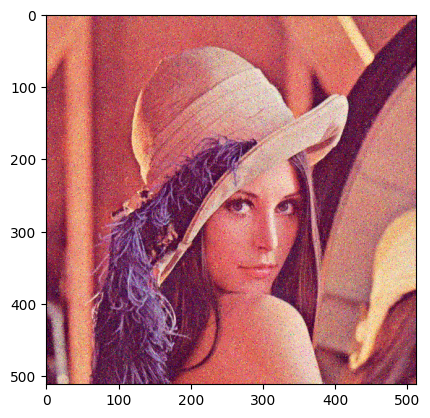

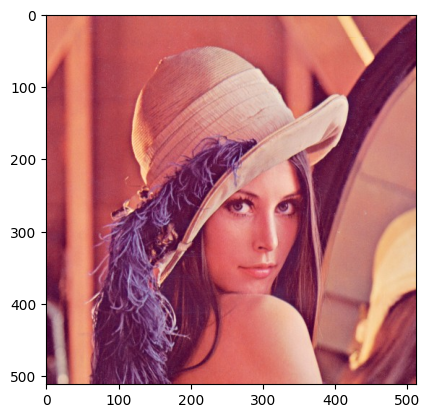

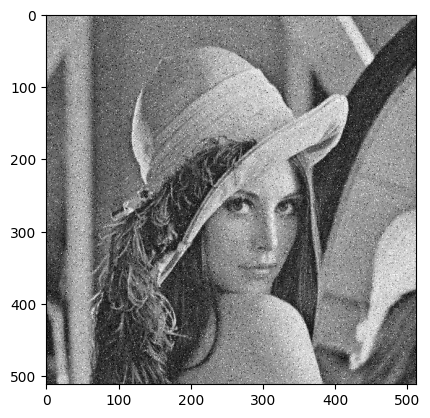

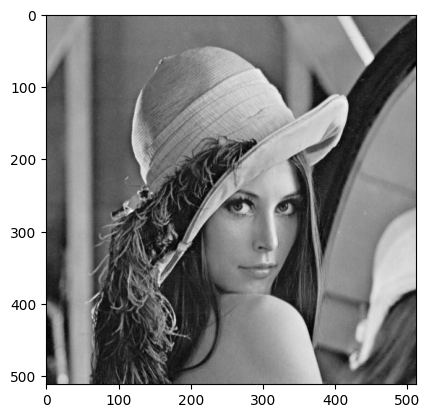

In [6]:
lena = cv2.imread('img/LENA_512.jpg')
lena_gray = cv2.imread('img/LENA_512.jpg', cv2.IMREAD_GRAYSCALE)

def gauss_noise(img, mu=0, sigma=50, prob=0.3):
    mask = np.random.uniform(0, 1, img.shape) < prob
    noise = np.random.normal(mu, sigma, img.shape)
    res = img.astype(np.int32) + (mask * noise).astype(dtype=np.int32)
    res = np.minimum(res, 255)
    res = np.maximum(res, 0)
    return res.astype(np.uint8)

plt.figure()
plt.imshow(cv2.cvtColor(gauss_noise(lena), cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(gauss_noise(lena_gray), cmap='gray')
plt.figure()
plt.imshow(lena_gray, cmap='gray')

## Zadanie 4 (2 punkty)

Napisz funkcję realizującą dodawanie do obrazka zakłócenia typu sól i pieprz w taki sposób, by zakłócenie to było dodatkowo mnożone przez prawdopodobieństwo wystąpienia tego zjawiska (a właściwie przez maskę 0-1). Proszę przetestować funkcję na obrazie LENA_512 w wersji kolorowej i w odcieniach szarości.

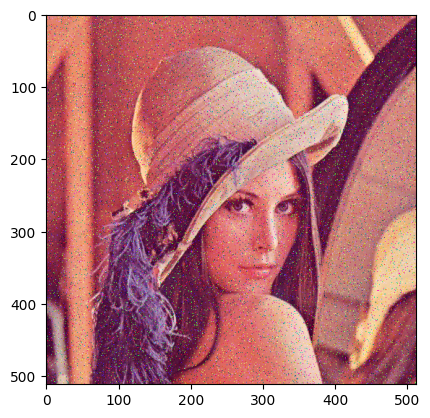

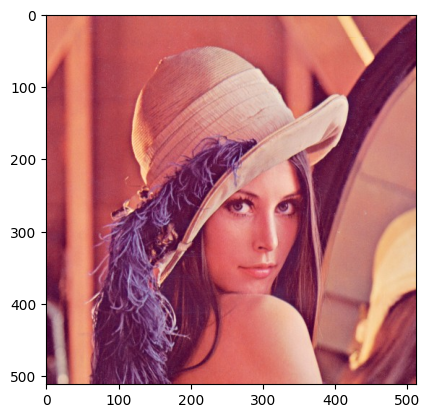

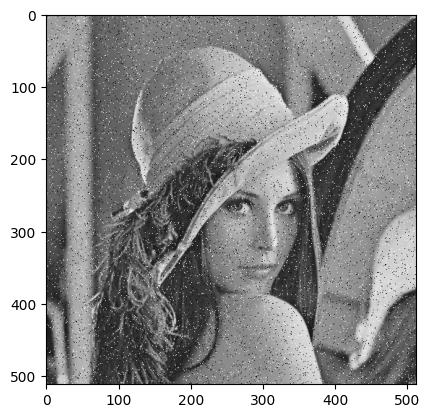

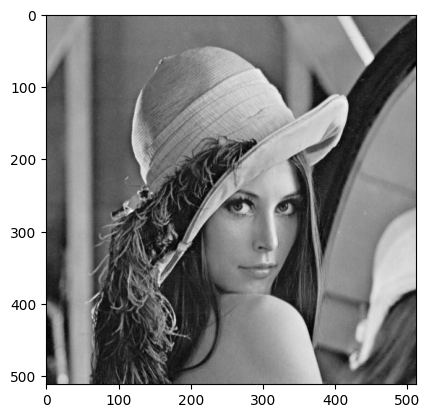

In [7]:
lena = cv2.imread('img/LENA_512.jpg')
lena_gray = cv2.imread('img/LENA_512.jpg', cv2.IMREAD_GRAYSCALE)

def sp_noise(img, prob=0.05):
    mask_min = np.random.uniform(0, 1, img.shape) < prob / 2
    mask_max = np.random.uniform(0, 1, img.shape) > (1 - prob / 2)
    noise = img.copy()
    noise[mask_min] = 0
    noise[mask_max] = 255
    return noise
    
plt.figure()
plt.imshow(cv2.cvtColor(sp_noise(lena), cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(sp_noise(lena_gray), cmap='gray')
plt.figure()
plt.imshow(lena_gray, cmap='gray')

## Zadanie 5 (1 punkt)
Wykonaj filtrację, używając filtra średniej ruchomej, obrazów zaszumionych powyższymi (trzema) sposobami. Użyj filtracji na obrazie "LENA_512.jpg" w formacie RGB na każdej warstwie niezależnie. Ponadto stwierdź (ale nie na oko!), jakość filtracji.

średnie odchylenie jednorodność: 5.647991180419922
średnie odchylenie gauss: 6.842427571614583
średnie odchylenie salt & pepper: 7.630770365397136


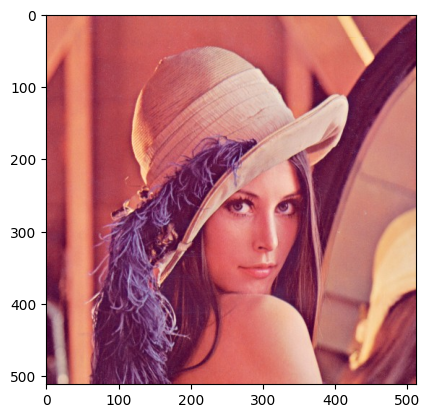

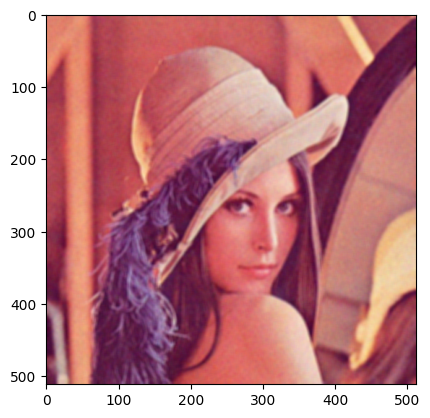

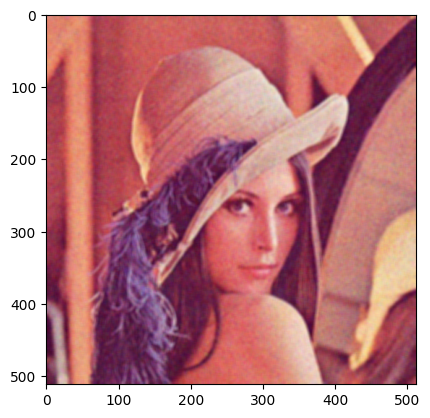

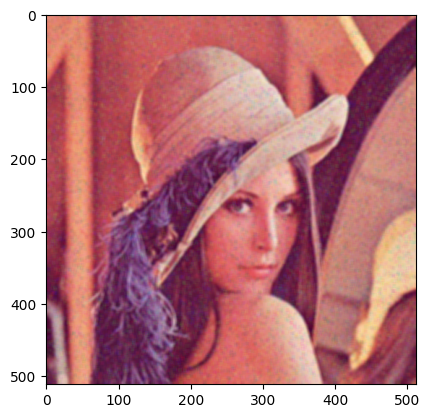

In [18]:
lena = cv2.imread('img/LENA_512.jpg')

lena_uniform = uniform_noise(lena)
lena_uniform_fixed = cv2.blur(lena_uniform, (5, 5))
lena_gauss = gauss_noise(lena)
lena_gauss_fixed = cv2.blur(lena_gauss, (5, 5))
lena_sp = sp_noise(lena)
lena_sp_fixed = cv2.blur(lena_sp, (5, 5))

plt.figure()
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(lena_uniform_fixed, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(lena_gauss_fixed, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(lena_sp_fixed, cv2.COLOR_BGR2RGB))

def get_score_blur(original, img):
    return np.sum(np.abs(original.astype(np.int32) - img.astype(np.int32)).astype(np.float32)) / len(img.flat)

print(f'średnie odchylenie jednorodność: {get_score_blur(lena, lena_uniform_fixed)}')
print(f'średnie odchylenie gauss: {get_score_blur(lena, lena_gauss_fixed)}')
print(f'średnie odchylenie salt & pepper: {get_score_blur(lena, lena_sp_fixed)}')

## Zadanie 6 (1 punkt)
Wykonaj filtrację, używając filtra medianowego, obrazów zaszumionych powyższymi (trzema) sposobami. Użyj filtracji na obrazie "LENA_512.jpg" w formacie RGB na każdej warstwie niezależnie. Ponadto stwierdź (ale nie na oko!), jakość filtracji.

średnie odchylenie jednorodność: 4.0838165283203125
średnie odchylenie gauss: 4.146409352620442
średnie odchylenie salt & pepper: 3.7470372517903647


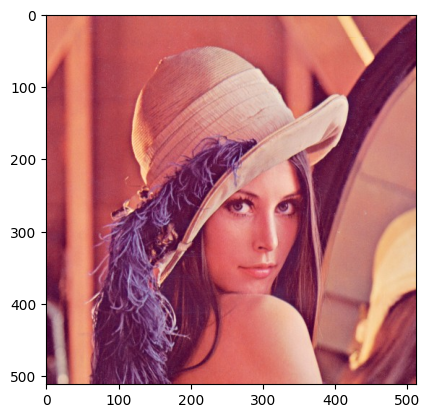

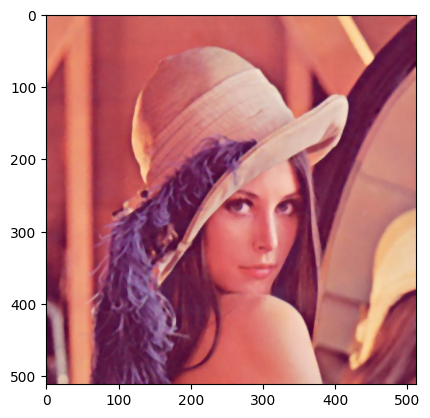

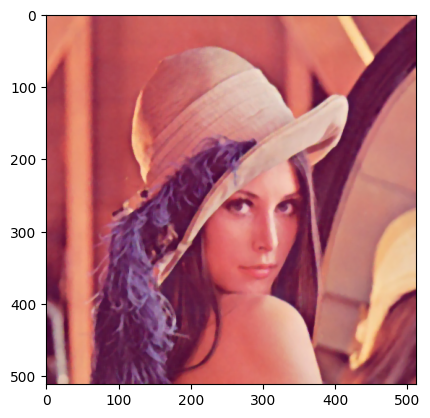

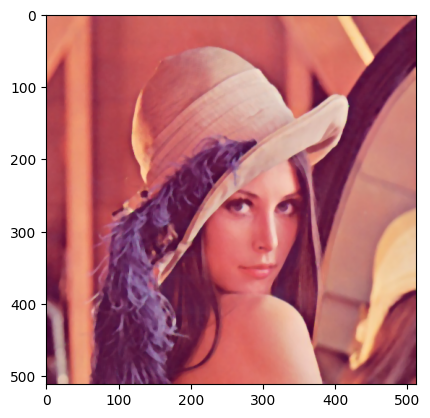

In [19]:
lena = cv2.imread('img/LENA_512.jpg')

lena_uniform = uniform_noise(lena)
lena_uniform_fixed = cv2.medianBlur(lena_uniform, 5)
lena_gauss = gauss_noise(lena)
lena_gauss_fixed = cv2.medianBlur(lena_gauss, 5)
lena_sp = sp_noise(lena)
lena_sp_fixed = cv2.medianBlur(lena_sp, 5)

plt.figure()
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(lena_uniform_fixed, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(lena_gauss_fixed, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(lena_sp_fixed, cv2.COLOR_BGR2RGB))

def get_score_blur(original, img):
    return np.sum(np.abs(original.astype(np.int32) - img.astype(np.int32)).astype(np.float32)) / len(img.flat)

print(f'średnie odchylenie jednorodność: {get_score_blur(lena, lena_uniform_fixed)}')
print(f'średnie odchylenie gauss: {get_score_blur(lena, lena_gauss_fixed)}')
print(f'średnie odchylenie salt & pepper: {get_score_blur(lena, lena_sp_fixed)}')